# GTHA housing market database
# OSEMN methodology Step 1: Obtain
# Obtain parcel-level land use

---

This notebook describes _Step 1: Obtain_ of OSEMN methodology, the process of obtaining parcel-level land use info.

---

For description of OSEMN methodology, see `methodology/0.osemn/osemn.pdf`.

## Import dependencies

In [16]:
import pandas as pd
import geopandas as gpd
import os
from time import time

In [17]:
data_path = '../../data/'
gta_lu_path = data_path + 'teranet/ParcelLandUse/GTA/'
os.listdir(gta_lu_path)

['GTA_land_use_code.txt',
 'GTAparcel16LU12.shx',
 'with_epoi',
 'GTAparcel16LU12.prj',
 'GTAparcel16LU12.cpg',
 'GTAparcel16LU12.shp',
 'GTAparcel16LU12.dbf']

In [18]:
ham_lu_path = data_path + 'teranet/ParcelLandUse/Halmilton/'
os.listdir(ham_lu_path)

['Hparcel16LU10.prj',
 'Halmilton_Land_Use_Codes_2009_Original.pdf',
 'with_epoi',
 'HalLanduse_converted.csv',
 'Hparcel16LU10.cpg',
 'Hparcel16LU10.shp',
 'Hparcel16LU10.dbf',
 'Hparcel16LU10.shx']

## Load geometry of land use

----- GeoDataFrame loaded
in 127.22 seconds (2.12 minutes)
with 1,490,138 rows
and 13 columns
-- Column names:
 Index(['FID_1', 'PIN', 'SHAPE_Leng', 'SHAPE_Area', 'FID_2', 'OBJECTID',
       'PIN_1', 'municipali', 'LANDUSE', 'LengthM', 'AreaM2', 'Distance',
       'geometry'],
      dtype='object')


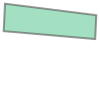

In [19]:
t = time()
lu_gta_gdf = gpd.read_file(gta_lu_path + 'GTAparcel16LU12.shp')
elapsed = time() - t

print("----- GeoDataFrame loaded"
      "\nin {0:.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(lu_gta_gdf.shape[0], lu_gta_gdf.shape[1]) + 
      "\n-- Column names:\n", lu_gta_gdf.columns)

lu_gta_gdf.iloc[0].geometry

In [ ]:
t = time()
lu_ham_gdf = gpd.read_file(ham_lu_path + 'Hparcel16LU10.shp')
elapsed = time() - t

print("----- GeoDataFrame loaded"
      "\nin {0:.2f} seconds ({1:.2f} minutes)".format(elapsed, elapsed / 60) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(lu_ham_gdf.shape[0], lu_ham_gdf.shape[1]) + 
      "\n-- Column names:\n", lu_ham_gdf.columns)

# lu_gta_gdf.plot(); # plotting the whole GeoDataFrame can take a very long time
lu_ham_gdf.iloc[0].geometry

In [ ]:
cols1 = ['FID_1', 'PIN', 'SHAPE_Leng', 'SHAPE_Area', 'FID_2', 'OBJECTID',
       'PIN_1', 'municipali', 'LANDUSE', 'LengthM', 'AreaM2', 'Distance',
       'geometry']
cols2 = ['FID_1', 'PIN', 'SHAPE_Area', 'OBJECTID', 'FID_2', ,
       'PIN_1', 'municipali', 'LANDUSE', 'LengthM', 'AreaM2', 'Distance',
       'geometry']

## Save results to a .csv file

In [15]:
pd.concat([lu_gta_gdf.drop('geometry', axis=1), lu_ham_gdf.drop('geometry', axis=1)])

/home/stepan/anaconda3/envs/gds/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,AreaM2,DEPTH,Distance,FID_1,FID_2,FRONTAGE,ID,LANDUSE,LengthM,OBJECTID,PIN,PIN_1,PROP_CODE,SHAPE_Area,SHAPE_Leng,SITE_AREA,Shape_Ar_1,Shape_Le_1,municipali
0,324.324560,NaN,0.0,0,0.0,NaN,NaN,1.0,87.261191,1,029440218,029440218,NaN,324.324575,87.261185,NaN,NaN,NaN,MARKHAM
1,311.471943,NaN,0.0,1,1.0,NaN,NaN,1.0,86.372900,2,029440066,029440066,NaN,311.471557,86.372818,NaN,NaN,NaN,MARKHAM
2,320.874339,NaN,0.0,2,2.0,NaN,NaN,1.0,88.599591,3,029440067,029440067,NaN,320.873519,88.599487,NaN,NaN,NaN,MARKHAM
3,630.101246,NaN,0.0,3,3.0,NaN,NaN,1.0,105.487687,4,032140190,032140190,NaN,630.097776,105.487638,NaN,NaN,NaN,RICHMOND HILL
4,15379.623971,NaN,0.0,4,4.0,NaN,NaN,28.0,1256.232726,5,032140342,032140342,NaN,15379.624211,1256.232795,NaN,NaN,NaN,RICHMOND HILL
5,5.030936,NaN,0.0,5,7.0,NaN,NaN,28.0,23.678658,8,032050382,032050382,NaN,5.030656,23.678593,NaN,NaN,NaN,RICHMOND HILL
6,5.326077,NaN,0.0,6,8.0,NaN,NaN,28.0,23.727378,9,032050381,032050381,NaN,5.325916,23.727373,NaN,NaN,NaN,RICHMOND HILL
7,683.899879,NaN,0.0,7,9.0,NaN,NaN,1.0,105.200807,10,029440001,029440001,NaN,683.898430,105.200708,NaN,NaN,NaN,MARKHAM
8,526.052300,NaN,0.0,8,10.0,NaN,NaN,1.0,100.099679,11,029440002,029440002,NaN,526.051506,100.099594,NaN,NaN,NaN,MARKHAM
9,470.475911,NaN,0.0,9,11.0,NaN,NaN,1.0,115.772284,12,029440004,029440004,NaN,470.474900,115.772130,NaN,NaN,NaN,MARKHAM


In [12]:
save_path = gta_lu_path + '../lu_info_gta.csv'
t = time()
lu_gta_gdf.drop('geometry', axis=1).to_csv(save_path, index=False)
elapsed = time() - t
print("DataFrame saved to file:\n", save_path,
      "\ntook {0:.2f} seconds".format(elapsed))

DataFrame saved to file:
 ../../data/teranet/ParcelLandUse/GTA/../lu_info_gta.csv 
took 26.22 seconds


In [13]:
save_path = ham_lu_path + '../lu_info_ham.csv'
t = time()
lu_ham_gdf.drop('geometry', axis=1).to_csv(save_path, index=False)
elapsed = time() - t
print("DataFrame saved to file:\n", save_path,
      "\ntook {0:.2f} seconds".format(elapsed))

DataFrame saved to file:
 ../../data/teranet/ParcelLandUse/Halmilton/../lu_info_ham.csv 
took 3.12 seconds
